In [3]:
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, accuracy_score
import matplotlib.pylab as plt
from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart



In [4]:
car_df = pd.read_csv("D:/dmba/ToyotaCorolla.csv")

In [5]:
excludeColumns = ('Price', 'Id', 'Model', 'Fuel_Type', 'Color')

In [6]:
predictors = [s for s in car_df.columns if s not in excludeColumns]
outcome = 'Price'

In [7]:
X = car_df[predictors]
y = car_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [8]:
reg = LinearRegression()
reg.fit(train_X, train_y)

LinearRegression()

In [9]:
regressionSummary(train_y, reg.predict(train_X))
regressionSummary(valid_y, reg.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1121.0606
            Mean Absolute Error (MAE) : 811.6770
          Mean Percentage Error (MPE) : -0.8630
Mean Absolute Percentage Error (MAPE) : 8.0054

Regression statistics

                      Mean Error (ME) : 97.1891
       Root Mean Squared Error (RMSE) : 1382.0352
            Mean Absolute Error (MAE) : 880.1396
          Mean Percentage Error (MPE) : 0.0138
Mean Absolute Percentage Error (MAPE) : 8.8744


In [10]:
pred_error_train = pd.DataFrame({'residual': train_y - reg.predict(train_X), 'data set': 'training'})
pred_error_valid = pd.DataFrame({'residual':valid_y - reg.predict(valid_X), 'data set': 'validation'})


In [11]:
pred_error_train

,residual,data set
1238,-182.013374,training
1085,322.194730,training
680,-1262.694404,training
593,-865.788499,training
647,-1588.369559,training
...,...,...
715,-369.819033,training
905,1011.024704,training
1096,1532.363420,training
235,-662.102590,training


In [12]:
pred_error_valid

,residual,data set
509,-571.500913,validation
435,364.071154,validation
321,-2467.333341,validation
1055,315.747965,validation
288,-1043.876953,validation
...,...,...
549,1789.218032,validation
300,-551.272524,validation
459,1050.051714,validation
797,53.907218,validation


In [13]:
boxdata_df = pd.concat([pred_error_train, pred_error_valid], axis=0)
boxdata_df.reset_index(drop=True, inplace=True)
boxdata_df

,residual,data set
0,-182.013374,training
1,322.194730,training
2,-1262.694404,training
3,-865.788499,training
4,-1588.369559,training
...,...,...
1431,1789.218032,validation
1432,-551.272524,validation
1433,1050.051714,validation
1434,53.907218,validation


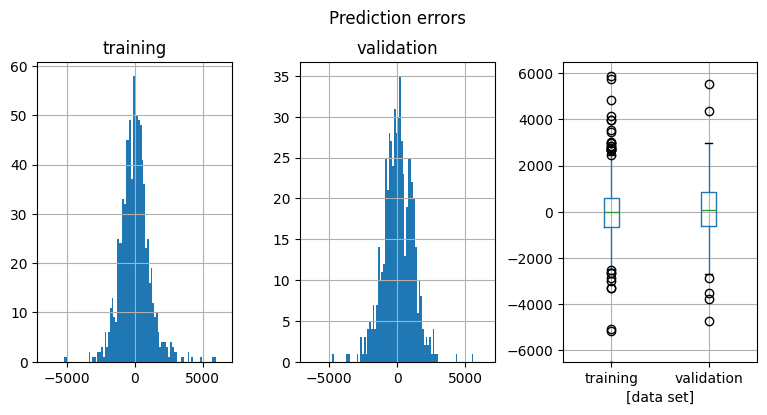

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(9,4)
common = {'bins':100, 'range':[-6500, 6500]}
pred_error_train.hist(ax=axes[0], **common)
pred_error_valid.hist(ax=axes[1], **common)
boxdata_df.boxplot(ax=axes[2], by = 'data set')

axes[0].set_title('training')
axes[1].set_title('validation')
axes[2].set_title(' ')
axes[2].set_ylim(-6500, 6500)
plt.suptitle('Prediction errors')
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()

In [15]:
df = pd.DataFrame({'predicted': reg.predict(valid_X), 'actual':valid_y})
df = df.sort_values(by=['predicted'], ascending=False)

In [16]:
df

,predicted,actual
111,26916.095816,31275
115,23740.895466,24990
10,22166.103042,20950
175,21855.869942,19950
119,21782.133511,22250
...,...,...
1060,5282.235373,7950
1073,5151.788800,7900
1058,4954.704555,10500
1048,3600.518386,4400


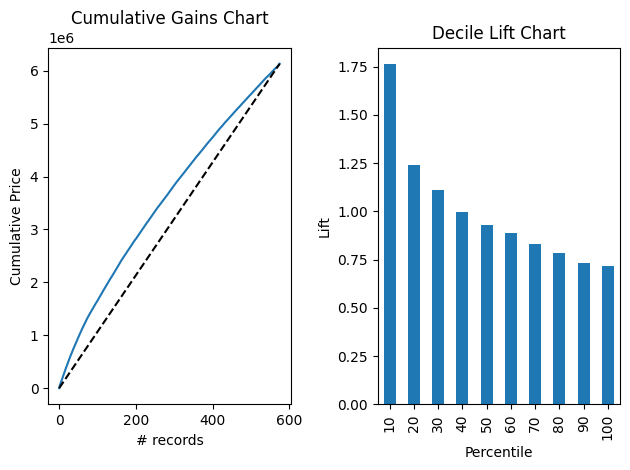

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(df['actual'], ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(df['actual'], ax = axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

In [19]:
owner_df = pd.read_csv("D:/dmba/ownerExample.csv")

In [20]:
predicted = ['owner' if p>0.5 else 'nonowner' for p in owner_df.Probability]

In [21]:
classificationSummary(owner_df.Class, predicted, class_names=['nonowner', 'owner'])

Confusion Matrix (Accuracy 0.8750)

         Prediction
  Actual nonowner    owner
nonowner       10        2
   owner        1       11


In [22]:
predicted = ['owner' if p>0.25 else 'nonowner' for p in owner_df.Probability]
classificationSummary(owner_df.Class, predicted, class_names=['nonowner', 'owner'])

Confusion Matrix (Accuracy 0.7917)

         Prediction
  Actual nonowner    owner
nonowner        8        4
   owner        1       11


In [23]:
predicted = ['owner' if p>0.75 else 'nonowner' for p in owner_df.Probability]
classificationSummary(owner_df.Class, predicted, class_names=['nonowner', 'owner'])

Confusion Matrix (Accuracy 0.7500)

         Prediction
  Actual nonowner    owner
nonowner       11        1
   owner        5        7


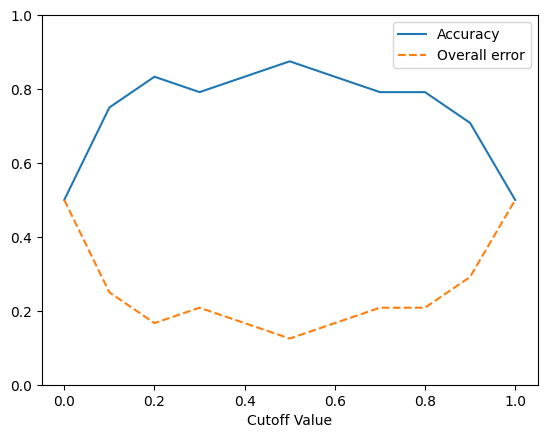

In [24]:
df = pd.read_csv("D:/dmba/liftExample.csv")

cutoffs = [i*0.1 for i in range(0, 11)]
accT = []
for cutoff in cutoffs:
    predicted = [1 if p > cutoff else 0 for p in df.prob]
    accT.append(accuracy_score(df.actual, predicted))

line_accuracy = plt.plot(cutoffs, accT, '-', label='Accuracy')[0]
line_error = plt.plot(cutoffs, [1-acc for acc in accT], '--', label = 'Overall error')[0]
plt.ylim([0,1])
plt.xlabel('Cutoff Value')
plt.legend(handles=[line_accuracy, line_error])
plt.show()

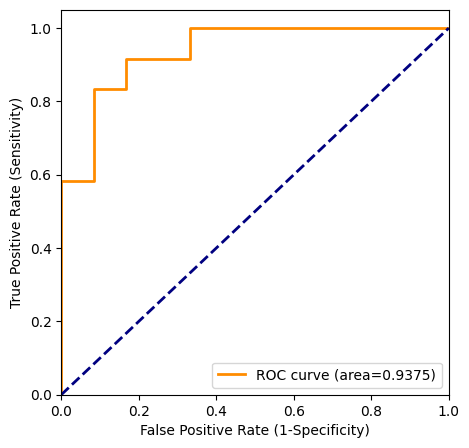

In [25]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(df.actual, df.prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5,5])
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area=%0.4f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')


<Axes: xlabel='# records', ylabel='# cumulative gains'>

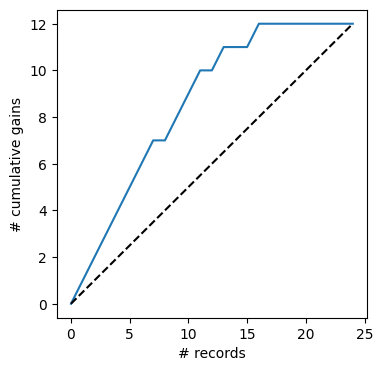

In [26]:
df = pd.read_csv("D:/dmba/liftExample.csv")
df = df.sort_values(by = ['prob'], ascending=False)
gainsChart(df.actual, figsize=(4,4))

<Axes: title={'center': 'Decile Lift Chart'}, xlabel='Percentile', ylabel='Lift'>

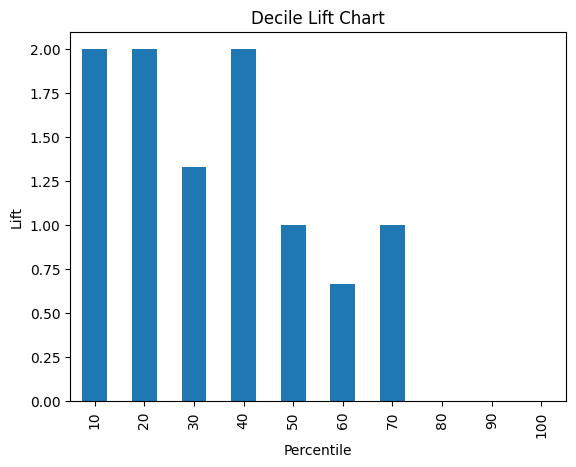

In [27]:
liftChart(df.actual, labelBars=False)